<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_05_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 05: Bonus Assignment

### <span style="color:maroon"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output.
    
* Comment your code
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own
* Try and minimize the use of the global namespace (meaning, keep things inside functions)
* Upload your pdf file (with visible output) to Canvas when done
---

In this lab, you will learn how to build and train feed-forward fully connected neural networks step-by-step. You will experiment with different settings like hidden layer sizes and activation functions on both the MNIST and Fashion MNIST datasets, and then analyze and report how these changes affect your model’s performance.
This bonus lab is optional and meant to challenge you beyond the weekly material. It involves more advanced concepts and may be difficult, but attempting it will significantly strengthen your skills and understanding. Remember, simply giving it a try is a great achievement!

In [2]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

## Datasets


### Fashion MNIST

We load the fashion_mnist dataset as before.

Label: t-shirt


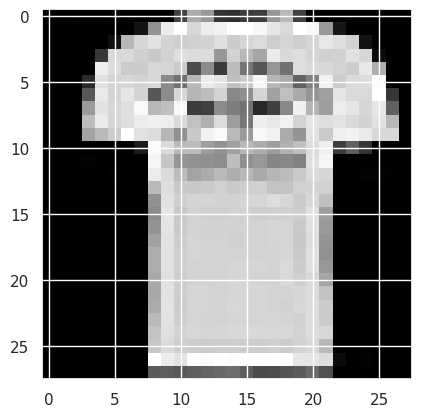

In [3]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

# Show the first training example.
print('Label: %s' %label_names[Y_train_fashion[0]])
plt.imshow(X_train_fashion[0], cmap='gray')
plt.show()

### MNIST

We also load the (digits) mnist dataset in the same way. Note that the number of train/test examples as well as the data shapes are identical to fashion_mnist.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Label: 3


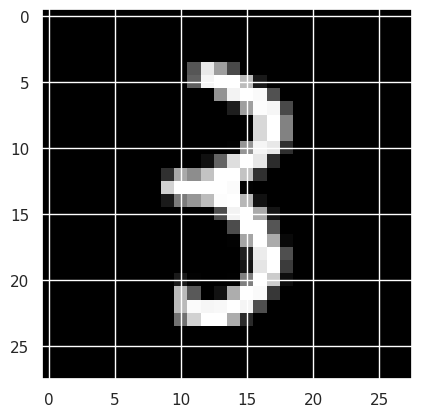

In [4]:
from keras.datasets import mnist

# Load the MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

# Show the first training example.
print('Label: %d' %Y_train_digits[0])
plt.imshow(X_train_digits[0], cmap='gray')
plt.show()

## Build a Model

We will write a build_model function that allows for a range of experiments on both datasets.

---
### Part 1 (25 points)

Complete the build_model function by writing code that uses all the parameters listed in its definition. Remember, the activation function parameter should be applied only to the hidden layers. For the final output layer, use the appropriate activation function for classification (such as softmax).

In [9]:
# @title Answer Part 1
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
    """Build a multi-class logistic regression model using Keras.

    Args:
      n_classes: Number of output classes in the dataset.
      hidden_layer_sizes: A list with the number of units in each hidden layer.
      activation: The activation function to use for the hidden layers.
      optimizer: The optimizer to use (SGD, Adam).
      learning_rate: The desired learning rate for the optimizer.

    Returns:
      model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    # YOUR CODE HERE
    model = tf.keras.models.Sequential()

    # Add a Flatten layer to handle the 3D input.
    # The model will flatten the 28x28 images into 784-element vectors.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Add hidden layers
    for layer_size in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(units=layer_size, activation=activation))

    # Add output layer
    model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax'))

    # Compile the model
    if optimizer == 'SGD':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer must be 'SGD' or 'Adam'")

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

---

## Experimental Analysis

Now, you will run a series of experiments to see how changing hyperparameters and the sizes of hidden layers affects the model’s performance. Use the train_and_evaluate function below to run these experiments and collect the results.

Training...


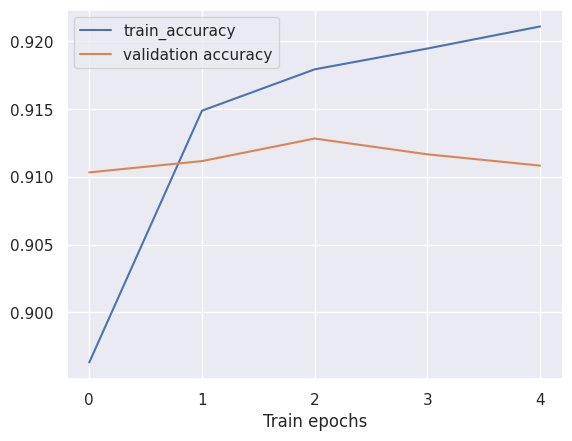

Test Accuracy: 0.9145


In [13]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=5):

  # Build the model.
  model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  # Select the dataset.
  if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
  elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion
  else:
# commenting error line from HW notebook
#    raise 'Unsupported dataset: %s' %data
    raise ValueError('Unsupported dataset: %s' %data)

  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=64,
    validation_split=0.1,
    verbose=0)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  return test_accuracy

print('Test Accuracy: %1.4f' %train_and_evaluate())

---
### Part 2 (50 points)

Run the experiments and record your test results in the table below. You are welcome to add more rows to explore additional experiment settings if you like.

In [ ]:
# @title Answer part 2, experiment code and explanation of parameters are given after the Student Solution markdown cell

#### Student Solution

DATA | HIDDEN SIZES | ACTIVATION | OPTIMIZER | LEARNING RATE | #PARAMETERS | TEST ACCURACY
-|-|-|-|-|-|-
digits|[]|tanh|SGD|0.01|7850|0.8981
digits|[]|relu|SGD|0.01|7850|0.8962
digits|[]|relu|Adam|0.01|7850|0.9148
digits|[128]|relu|Adam|0.01|101,770|0.9686
digits|[256,128]|relu|Adam|07850.01|235,146|0.9652
-
fashion|[]|tanh|SGD|0.01|7850|0.8094
fashion|[]|relu|SGD|0.01|7850|0.8086
fashion|[]|relu|Adam|0.01|7850|0.8231
fashion|[128]|relu|Adam|0.01|101,770|0.8516
fashion|[256,128]|relu|Adam|0.01|235,146|0.8567


In [ ]:
# @title Answer Part 2, running experiment for each row of inputs

**Parameters in a Neural network calculation:**
* Number of parameters in a neural network is based on number of neurons in each layer.
* The parameters for a single layer consist of two parts: the weights and the biases.
* Weights connecting two layers = source layer neurons X destination layer neurons
* Biases for a layer = number of destination neurons in that layer.
* Parameters for each layer = Weights + Biases
* Total parameters for a neural network = sum of parameters from each layer.


**Parameters for Model with Hidden Layers[] (no hiden layers).**
* Only Input layer to Output layer, no hidden layers
* Input layer has 784 neuron (= 28 pixel x 28 pixel in each digit)
* Output layer has 10 neuron (= 10 classes of digits)
* **Total parameters for single layer = 784 x 10 (weights) + 10 (Biases) = 7,850.**


**Parameters for Model with 1 Hidden Layer[128].**
* Input layer has 784 neuron (= 28 pixel x 28 pixel in each digit)
* 1 hidden layer of 128 neurons
* Output layer has 10 neuron (= 10 classes of digits)
* Parameters of Input to Hidden = 784 x 128 (weights) + 128 (biases) = 100,480
* Parameters of Hidden to Output  = 128 x 10 (weights) + 10 (biases) = 1,290
* **Total parameters of one hidden level model = 100,480 (Input->Hidden) + 1,290 (Hidden->Output) = 101,770.**


**Parameters for Model with 2 Hidden Layers [256, 128].**
* Input layer has 784 neuron (= 28 pixel x 28 pixel in each digit)
* 1st Hidden layer has 256 neurons
* 2nd Hidden layer has 128 neurons
* Output layer has 10 neuron (= 10 classes of digits)
* Parameters of Input to 1st Hidden : 784×256 (weights) +256 (biases)=200,960
* Parameters of 1st Hidden to 2nd Hidden: 256x128 (weights) +128 (biases)= 32,896
* Parameters of 2nd Hidden to Output: 128 x 10 (weights) +10 (biases)= 1,290
* **Total parameters of two hidden level model = 200,960 (In->1H) + 32,896 (1H->2H) + 1,290(2H->Out) = 235,146**

Experiment 1:
Training...


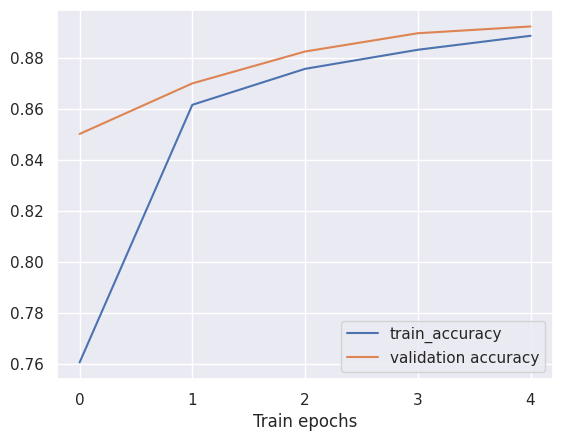

Test Accuracy: 0.8981



In [14]:
# @title Experiment 1: Digits, no hidden layers, tanh, SGD
print('Experiment 1:')
test_accuracy = train_and_evaluate(data='digits',
                                   hidden_layer_sizes=[],
                                   activation='tanh',
                                   optimizer='SGD',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

Experiment 2:
Training...


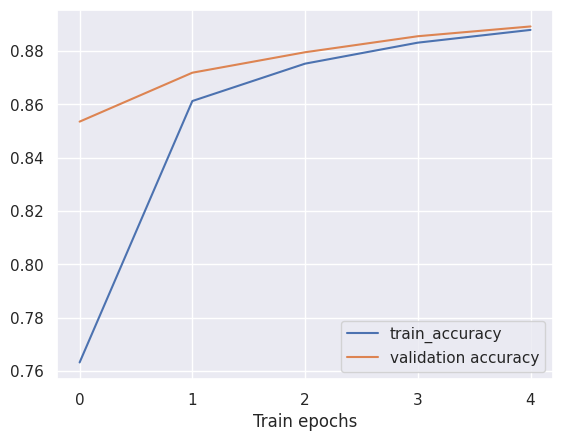

Test Accuracy: 0.8962



In [15]:
# @title Experiment 2: Digits, no hidden layers, relu, SGD
print('Experiment 2:')
test_accuracy = train_and_evaluate(data='digits',
                                   hidden_layer_sizes=[],
                                   activation='relu',
                                   optimizer='SGD',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

Experiment 3:
Training...


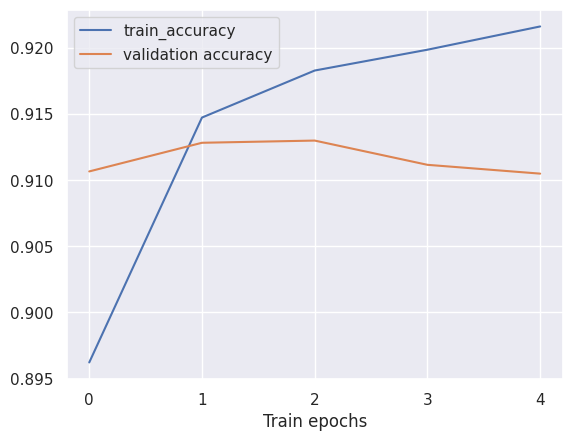

Test Accuracy: 0.9148



In [16]:
# @title Experiment 3: Digits, no hidden layers, relu, Adam
print('Experiment 3:')
test_accuracy = train_and_evaluate(data='digits',
                                   hidden_layer_sizes=[],
                                   activation='relu',
                                   optimizer='Adam',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

Experiment 4:
Training...


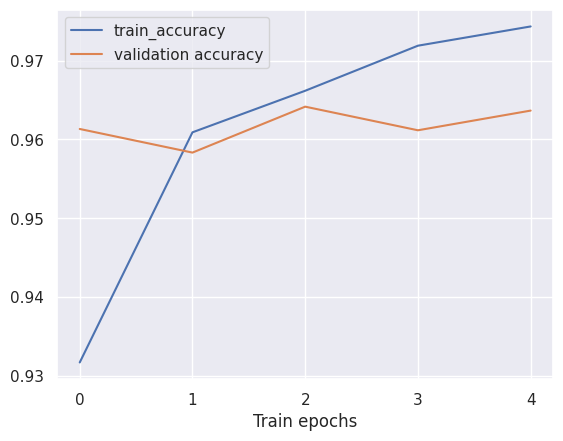

Test Accuracy: 0.9686



In [20]:
# @title Experiment 4: Digits, one hidden layer, relu, Adam
print('Experiment 4:')
test_accuracy = train_and_evaluate(data='digits',
                                   hidden_layer_sizes=[128],
                                   activation='relu',
                                   optimizer='Adam',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')


Experiment 5:
Training...


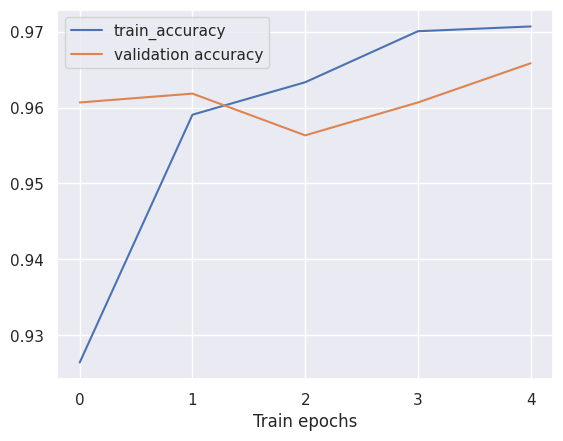

Test Accuracy: 0.9652



In [18]:
# @ title Experiment 5: Digits, two hidden layers, relu, Adam
print('Experiment 5:')
test_accuracy = train_and_evaluate(data='digits',
                                   hidden_layer_sizes=[256, 128],
                                   activation='relu',
                                   optimizer='Adam',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

Experiment 6:
Training...


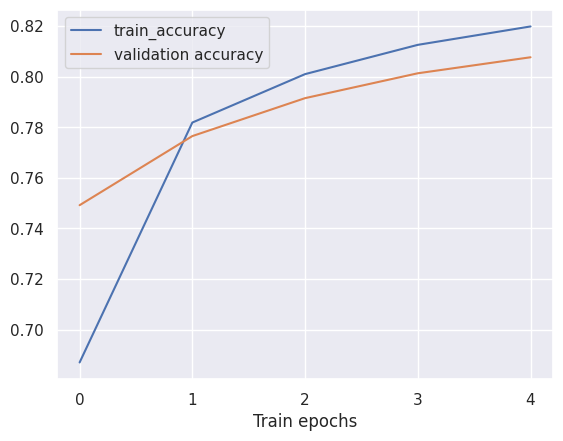

Test Accuracy: 0.8094

Experiment 7:
Training...


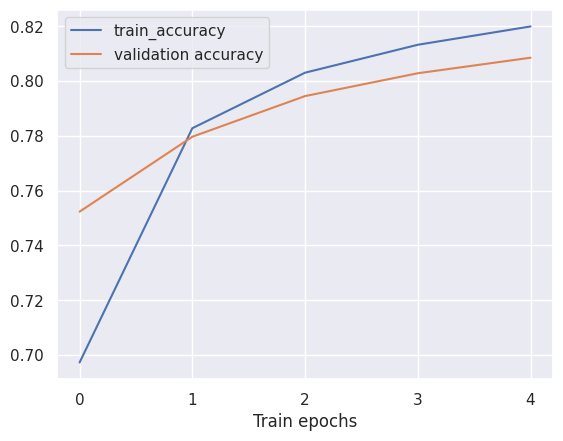

Test Accuracy: 0.8086

Experiment 8:
Training...


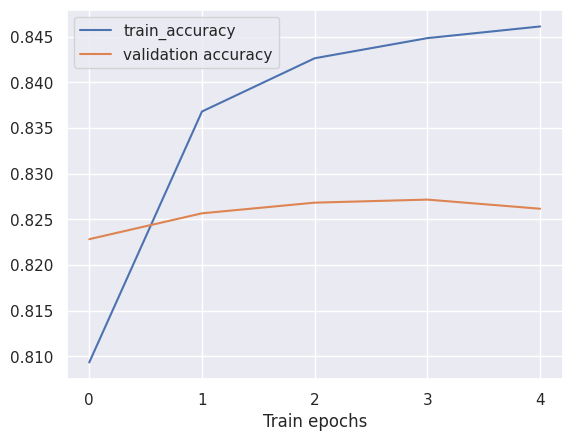

Test Accuracy: 0.8231

Experiment 9:
Training...


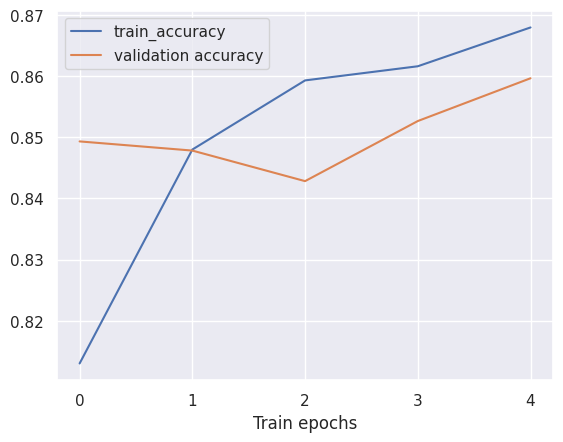

Test Accuracy: 0.8516

Experiment 10:
Training...


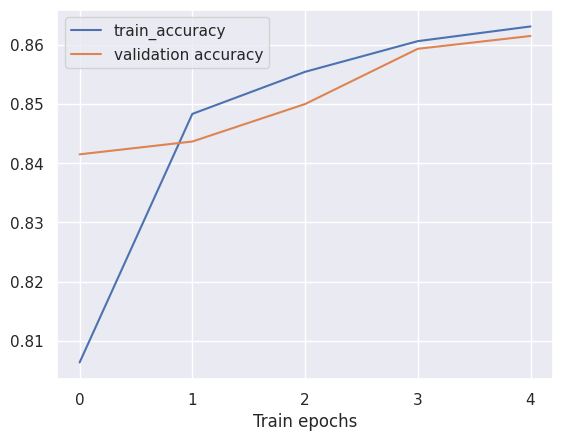

Test Accuracy: 0.8567



In [17]:
# @title Experiment 6-10
# Experiment 6: Fashion, no hidden layers, tanh, SGD
print('Experiment 6:')
test_accuracy = train_and_evaluate(data='fashion',
                                   hidden_layer_sizes=[],
                                   activation='tanh',
                                   optimizer='SGD',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

# Experiment 7: Fashion, no hidden layers, relu, SGD
print('Experiment 7:')
test_accuracy = train_and_evaluate(data='fashion',
                                   hidden_layer_sizes=[],
                                   activation='relu',
                                   optimizer='SGD',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

# Experiment 8: Fashion, no hidden layers, relu, Adam
print('Experiment 8:')
test_accuracy = train_and_evaluate(data='fashion',
                                   hidden_layer_sizes=[],
                                   activation='relu',
                                   optimizer='Adam',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

# Experiment 9: Fashion, one hidden layer, relu, Adam
print('Experiment 9:')
test_accuracy = train_and_evaluate(data='fashion',
                                   hidden_layer_sizes=[128],
                                   activation='relu',
                                   optimizer='Adam',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')

# Experiment 10: Fashion, two hidden layers, relu, Adam
print('Experiment 10:')
test_accuracy = train_and_evaluate(data='fashion',
                                   hidden_layer_sizes=[256, 128],
                                   activation='relu',
                                   optimizer='Adam',
                                   learning_rate=0.01)
print(f'Test Accuracy: {test_accuracy:.4f}\n')